In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE,ADASYN
import pickle

from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
%run mirazul_ploting_utils.ipynb
%matplotlib inline

In [2]:
link='E:/ML/covid_final/Images/'

In [4]:
df = pd.read_csv('../Data/test_csv_main_upsampled.csv')

df

,age,bmi,alcohol,cannabis,contacts_count,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,health_worker,sex,smoking,covid19_positive
0,4,22.614941,2,2.691281,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,5,27.500000,0,2.691281,20,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3,34.200000,-1,2.691281,21,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,9,31.300000,0,2.691281,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
4,4,36.730399,3,2.691281,7,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20298,6,28.300000,10,20.000000,3,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
20299,3,22.142372,4,25.820465,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20300,2,48.600000,-1,2.691281,10,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
20301,6,27.100000,-1,-1.000000,21,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df1 = pd.read_csv('../Data/train_csv_main_upsampled.csv')

df1

,age,bmi,alcohol,cannabis,contacts_count,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,health_worker,sex,smoking,covid19_positive
0,3,29.000000,1,0.000000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,3,0
1,5,24.072751,7,2.691281,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,5,22.300000,13,0.000000,21,1,0,1,0,0,...,0,0,0,0,0,0,0,0,7,0
3,5,34.200000,1,2.691281,18,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,4,39.600000,0,0.000000,8,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60904,5,29.600000,2,-1.000000,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60905,6,20.492990,1,2.691281,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60906,8,31.554536,-1,2.691281,20,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
60907,3,22.300000,-1,2.691281,10,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


C:\Users\AbdulAwal\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


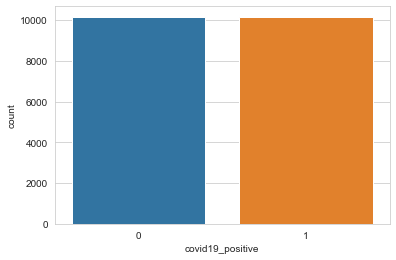

In [4]:
sns.set_style("whitegrid")
sns.countplot(df['covid19_positive'])

In [8]:
x_train = df1.drop(columns='covid19_positive')
y_train = df1['covid19_positive']
x_test = df.drop(columns='covid19_positive')
y_test = df['covid19_positive']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20303 entries, 0 to 20302
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 20303 non-null  int64  
 1   bmi                 20303 non-null  float64
 2   alcohol             20303 non-null  int64  
 3   cannabis            20303 non-null  float64
 4   contacts_count      20303 non-null  int64  
 5   covid19_symptoms    20303 non-null  int64  
 6   covid19_contact     20303 non-null  int64  
 7   asthma              20303 non-null  int64  
 8   kidney_disease      20303 non-null  int64  
 9   liver_disease       20303 non-null  int64  
 10  compromised_immune  20303 non-null  int64  
 11  heart_disease       20303 non-null  int64  
 12  lung_disease        20303 non-null  int64  
 13  diabetes            20303 non-null  int64  
 14  hiv_positive        20303 non-null  int64  
 15  hypertension        20303 non-null  int64  
 16  othe

<AxesSubplot:>

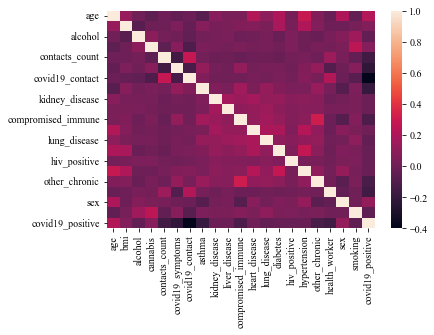

In [10]:
sns.heatmap(df1.corr())

In [11]:
#Random forrest
RF_HHO_opt = pickle.load(
    open('../Trained_models/optimized_RandomForrest_model_train_file.sav',
         'rb'))
y_pred_HHO_RF = RF_HHO_opt.predict(x_test)

C:\Users\dodul\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\dodul\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [9]:
LGB_opt_clf = pickle.load(
    open('../Trained_models/optimized_lgb_model_categorical_train_file.sav',
         'rb'))
CAT_opt_clf = pickle.load(
    open('../Trained_models/optimized_catboost_model_train_file.sav', 'rb'))
XGB_opt_clf = pickle.load(
    open('../Trained_models/optimized_xgb_model_train_filetwo.sav', 'rb'))
SVC_opt = pickle.load(open('../Trained_models/optimized_svc_model.sav', 'rb'))
KNN_opt = KNeighborsClassifier(n_jobs=-1)
KNN_opt_clf = KNN_opt.fit(x_train, y_train)

DT_opt = DecisionTreeClassifier()
DT_opt_clf = DT_opt.fit(x_train, y_train)

NB_Opt = BernoulliNB()
NB_Opt_clf = NB_Opt.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
LDA_opt = LinearDiscriminantAnalysis()
LDA_opt_clf = LDA_opt.fit(x_train, y_train)

QLDA_opt = QuadraticDiscriminantAnalysis()
QLDA_opt_clf = QLDA_opt.fit(x_train, y_train)

In [11]:
y_pred_HHO_LGB = LGB_opt_clf.predict(x_test)
y_pred_HHO_SVC = SVC_opt.predict(x_test)
y_pred_HHO_CAT = CAT_opt_clf.predict(x_test)
y_pred_DT = DT_opt_clf.predict(x_test)
y_pred_KNN = KNN_opt_clf.predict(x_test)
y_pred_NB = NB_Opt_clf.predict(x_test)
y_pred_LDA = LDA_opt_clf.predict(x_test)
y_pred_QLDA = QLDA_opt_clf.predict(x_test)

In [12]:
y_pred_HHO_XGB=XGB_opt_clf.predict(x_test)

In [13]:
def multiplot_CM(names, clf, x_test, y_test):
    for i in range(len(names)):
        print('for this {} :'.format(names[i]),
              plot_confusion_matrix(clf[i], x_test, y_test))

In [14]:
def multiclassification_report(names, pred, y_test):
    for i in range(len(names)):
        print(" for {} and report is \n {}".format(
            names[i], classification_report(y_test, pred[i]))), print(
                "  mathews score is {} and kappa score is {}".format(
                    matthews_corrcoef(y_test, pred[i]),
                    cohen_kappa_score(y_test, pred[i])))

In [16]:
print("", classification_report(y_test, y_pred_HHO_RF)), print(
    "  mathews score is {} and kappa score is {}".format(
        matthews_corrcoef(y_test, y_pred_HHO_RF),
        cohen_kappa_score(y_test, y_pred_HHO_RF)))

               precision    recall  f1-score   support

           0       0.92      0.91      0.92     10167
           1       0.91      0.92      0.92     10136

    accuracy                           0.92     20303
   macro avg       0.92      0.92      0.92     20303
weighted avg       0.92      0.92      0.92     20303

  mathews score is 0.8305868833871831 and kappa score is 0.8305682491991607


(None, None)

# Ensemble model

In [17]:
#estimator and names fuction
def est(clf, names):
    estm = []
    for i in range(len(clf)):
        n = names[i]
        claf = clf[i]
        estm.append((n, claf))
    return estm


clf_use = [LGB_opt_clf, CAT_opt_clf, XGB_opt_clf, RF_HHO_opt, SVC_opt]
names_use = [
    'HHO LGB OPT', 'HHO CAT OPT', 'HHO XGB OPT', 'RF_HHO_optt', 'HHO SVC_opt'
]
estimator = est(clf_use, names_use)

In [18]:
# evaluate each base model
def evaluate_models(models, X_val, y_val):
    scores = list()
    for name, model in models:
        yhat = model.predict(X_val)
        acc = accuracy_score(y_val, yhat)
        scores.append(acc)

    return scores


weight_score = evaluate_models(estimator, x_test, y_test)

In [19]:
weight_score

[0.9046938876028173,
 0.8680983105944934,
 0.9254297394473723,
 0.9152834556469487,
 0.8453923065556814]

In [20]:
weight_score1=[.15,.05,.50,.25,.05] #lgb,catboost,Xgb,RANDOMFORREST

In [21]:
ensemble = VotingClassifier(estimators=estimator,
                            weights=weight_score1,
                            voting='soft')
ensemble.fit(x_train, y_train)
y_pred_ENSEMBLE = ensemble.predict(x_test)
# evaluate predictions
score = accuracy_score(y_test, y_pred_ENSEMBLE)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.5220794779775828 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=98 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=0.46854465841871085 will be ignored. Current value: bagging_fraction=1.0


In [22]:
score

0.9267103383736394

In [23]:
score_xg=accuracy_score(y_test,y_pred_HHO_RF)

In [24]:
score_xg

0.9152834556469487

In [25]:
names = [
    'HHO LGB OPT', 'HHO CAT OPT', 'HHO XGB OPT', 'HHO SVC OPT',
    'ENSEMBLE_MODEL', 'DecisionTreeClassifier', 'KNeighborsClassifier',
    'BernoulliNB', 'LinearDiscriminantAnalysis',
    'QuadraticDiscriminantAnalysis'
]
clf = [
    LGB_opt_clf, CAT_opt_clf, XGB_opt_clf, SVC_opt, ensemble, DT_opt_clf,
    KNN_opt_clf, NB_Opt_clf, LDA_opt_clf, QLDA_opt_clf
]
pred = [
    y_pred_HHO_LGB, y_pred_HHO_CAT, y_pred_HHO_XGB, y_pred_HHO_SVC,
    y_pred_ENSEMBLE, y_pred_DT, y_pred_KNN, y_pred_NB, y_pred_LDA, y_pred_QLDA
]

In [71]:
proba_df = pd.DataFrame({
    'HHO_LGB': LGB_opt_clf.predict_proba(x_test)[:, 1],
    'HHO_CAT': CAT_opt_clf.predict_proba(x_test)[:, 1],
    'HHO_RF': RF_HHO_opt.predict_proba(x_test)[:, 1],
    'HHO_XGB': XGB_opt_clf.predict_proba(x_test)[:, 1],
    'HHO_SVC': SVC_opt.predict_proba(x_test)[:, 1],
    'ENSEMBLE_model': ensemble.predict_proba(x_test)[:, 1],
    'DT': DT_opt_clf.predict_proba(x_test)[:, 1],
    'KNN': KNN_opt_clf.predict_proba(x_test)[:, 1],
    'NB': NB_Opt_clf.predict_proba(x_test)[:, 1],
    'LDA': LDA_opt_clf.predict_proba(x_test)[:, 1],
    'QLDA': QLDA_opt_clf.predict_proba(x_test)[:, 1],
})

In [72]:
proba_df

,HHO_LGB,HHO_CAT,HHO_RF,HHO_XGB,HHO_SVC,ENSEMBLE_model,DT,KNN,NB,LDA,QLDA
0,0.999387,0.883117,0.979362,0.999094,1.000000,0.992163,1.0,1.0,0.795339,0.748062,9.986078e-01
1,0.995832,0.859327,0.986867,0.997632,0.694660,0.972173,1.0,0.8,0.868254,0.810760,9.974915e-01
2,0.004888,0.094769,0.011257,0.000883,0.084014,0.013818,0.0,0.0,0.078720,0.046125,9.195044e-08
3,0.999576,0.922220,0.923077,0.931147,0.290708,0.898388,1.0,1.0,0.911890,0.980781,9.999640e-01
4,0.999201,0.916087,0.997186,0.999219,0.748651,0.981723,1.0,1.0,0.883388,0.901275,9.998126e-01
...,...,...,...,...,...,...,...,...,...,...,...
20298,0.373642,0.151720,0.121951,0.024870,0.270201,0.116129,0.0,0.2,0.227081,0.447755,4.286709e-07
20299,0.983272,0.873761,0.962477,0.995907,0.790875,0.971495,1.0,1.0,0.823707,0.866299,9.755655e-01
20300,0.108063,0.406119,0.413696,0.127053,0.896753,0.263921,0.0,0.8,0.679225,0.406901,9.344616e-01
20301,0.000086,0.081945,0.000000,0.000640,0.007525,0.004677,0.0,0.0,0.090528,0.249475,1.147894e-02


In [28]:
#proba_df.to_csv('y_test and all classifier probabili.csv')

In [63]:
#this is needed for precision recall curve
proba_dic = dict(HHO_LGB=LGB_opt_clf.predict_proba(x_test)[:, 1],
                 HHO_CAT=CAT_opt_clf.predict_proba(x_test)[:, 1],
                 HHO_RF=RF_HHO_opt.predict_proba(x_test)[:, 1],
                 HHO_XGB=XGB_opt_clf.predict_proba(x_test)[:, 1],
                 HHO_SVC=SVC_opt.predict_proba(x_test)[:, 1],
                 ENSEMBLE_model=ensemble.predict_proba(x_test)[:, 1],
                 DT=DT_opt_clf.predict_proba(x_test)[:, 1],
                 KNN=KNN_opt_clf.predict_proba(x_test)[:, 1],
                 NB=NB_Opt_clf.predict_proba(x_test)[:, 1],
                 LDA=LDA_opt_clf.predict_proba(x_test)[:, 1],
                 QLDA=QLDA_opt_clf.predict_proba(x_test)[:, 1])

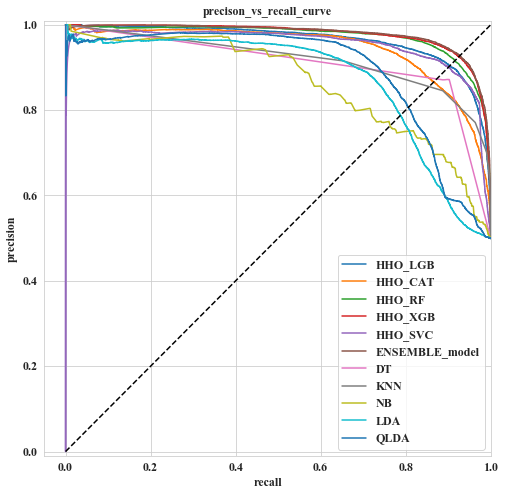

In [64]:
plot_multi_precison_vs_recall_curve(proba_dic,y_test,link+'p_r_c.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


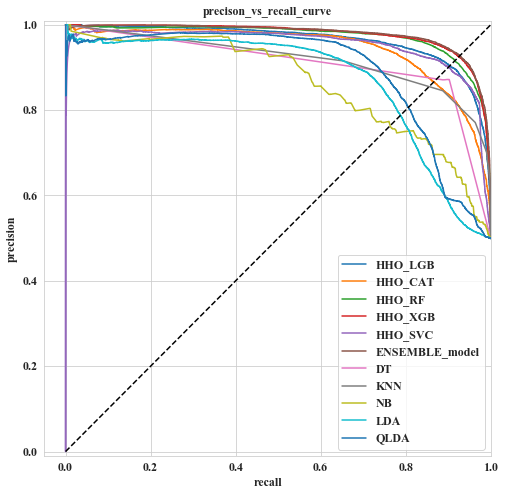

In [65]:
plot_multi_precison_vs_recall_curve(proba_dic,y_test,link+'p_r_c.eps')

In [38]:
multiclassification_report(names,pred,y_test)

 for HHO LGB OPT and report is 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90     10167
           1       0.90      0.91      0.91     10136

    accuracy                           0.90     20303
   macro avg       0.90      0.90      0.90     20303
weighted avg       0.90      0.90      0.90     20303

  mathews score is 0.8094963577127494 and kappa score is 0.8093920038814912
 for HHO CAT OPT and report is 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87     10167
           1       0.90      0.83      0.86     10136

    accuracy                           0.87     20303
   macro avg       0.87      0.87      0.87     20303
weighted avg       0.87      0.87      0.87     20303

  mathews score is 0.7383038826459362 and kappa score is 0.7361653709300591
 for HHO XGB OPT and report is 
               precision    recall  f1-score   support

           0       0.93      0.92      0

In [39]:
#multiplot_CM(names=names,clf=clf,x_test=x_test,y_test=y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


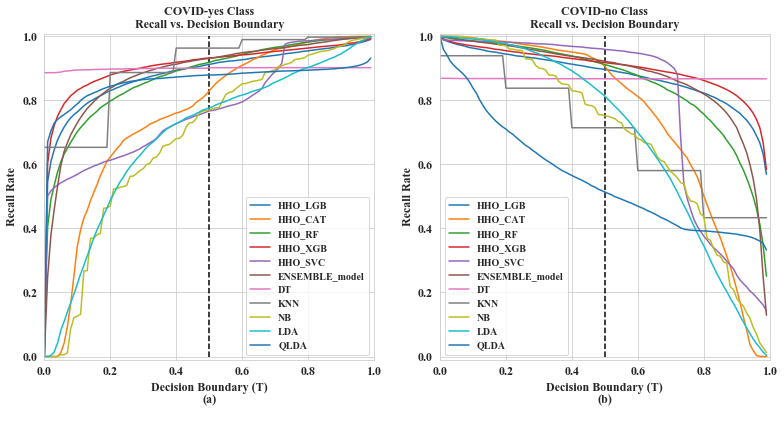

In [40]:
proba_R_D_curve = dict(HHO_LGB=LGB_opt_clf.predict_proba(x_test),
                       HHO_CAT=CAT_opt_clf.predict_proba(x_test),
                       HHO_RF=RF_HHO_opt.predict_proba(x_test),
                       HHO_XGB=XGB_opt_clf.predict_proba(x_test),
                       HHO_SVC=SVC_opt.predict_proba(x_test),
                       ENSEMBLE_model=ensemble.predict_proba(x_test),
                       DT=DT_opt_clf.predict_proba(x_test),
                       KNN=KNN_opt_clf.predict_proba(x_test),
                       NB=NB_Opt_clf.predict_proba(x_test),
                       LDA=LDA_opt_clf.predict_proba(x_test),
                       QLDA=QLDA_opt_clf.predict_proba(x_test))

filename = 'multi_recall_vs_decision_boundary.eps'
plot_multi_recall_vs_decision_boundary(proba_R_D_curve, y_test,link+filename)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


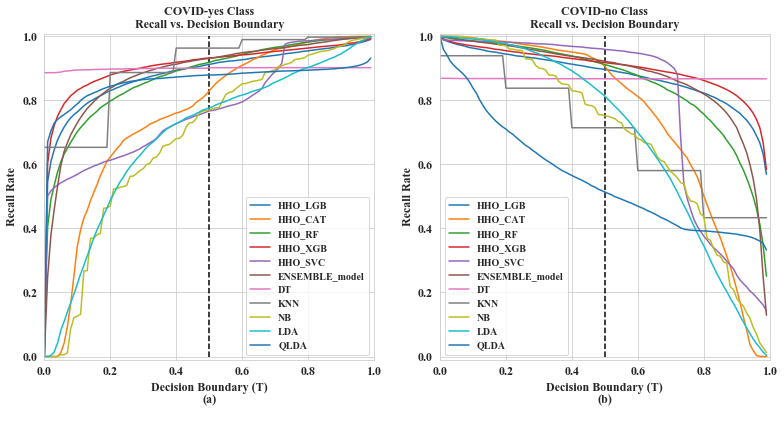

In [68]:
filename='multi_recall_vs_decision_boundary.png'
plot_multi_recall_vs_decision_boundary(proba_R_D_curve, y_test,link+filename)

HHO_LGB
  AUC: 0.964
HHO_CAT
  AUC: 0.945
HHO_RF
  AUC: 0.974
HHO_XGB
  AUC: 0.977
HHO_SVC
  AUC: 0.956
ENSEMBLE_model
  AUC: 0.978
DT
  AUC: 0.885
KNN
  AUC: 0.922
NB
  AUC: 0.852
LDA
  AUC: 0.843
QLDA
  AUC: 0.869


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


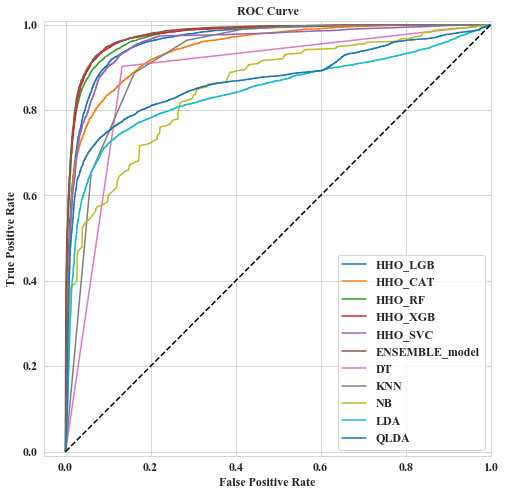

In [73]:
filename = 'ROC_curve_covid.eps'
plot_roc_curves(proba_df, y_test,link+filename)

HHO_LGB
  AUC: 0.964
HHO_CAT
  AUC: 0.945
HHO_RF
  AUC: 0.974
HHO_XGB
  AUC: 0.977
HHO_SVC
  AUC: 0.956
ENSEMBLE_model
  AUC: 0.978
DT
  AUC: 0.885
KNN
  AUC: 0.922
NB
  AUC: 0.852
LDA
  AUC: 0.843
QLDA
  AUC: 0.869


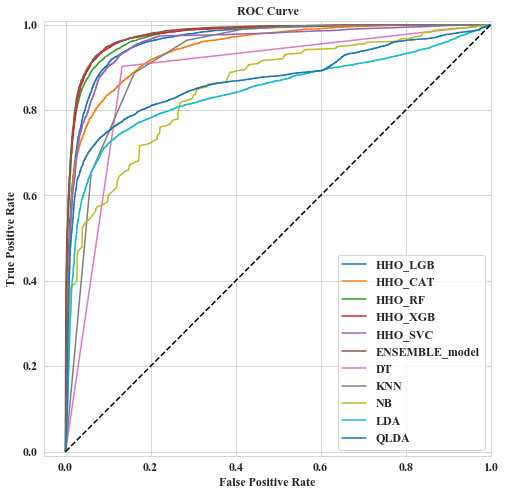

In [74]:
filename='ROC_curve_covid.png'
plot_roc_curves(proba_df, y_test,link+filename)

In [44]:
predict_dic = dict(HHO_LGB=LGB_opt_clf.predict(x_test),
                   HHO_CAT=CAT_opt_clf.predict(x_test),
                   HHO_RF=RF_HHO_opt.predict(x_test),
                   HHO_XGB=XGB_opt_clf.predict(x_test),
                   HHO_SVC=SVC_opt.predict(x_test),
                   ENSEMBLE=ensemble.predict(x_test),
                   DT=DT_opt_clf.predict(x_test),
                   KNN=KNN_opt_clf.predict(x_test),
                   NB=NB_Opt_clf.predict(x_test),
                   LDA=LDA_opt_clf.predict(x_test),
                   QLDA=QLDA_opt_clf.predict(x_test),
                   Y_test=y_test)

In [45]:
df_desicion_support=pd.DataFrame.from_dict(predict_dic)

In [46]:
df_desicion_support.to_csv('Y_test_and_prediction_of_classifier.csv')

# Shap analysis

In [86]:
import matplotlib.pyplot as plt

In [54]:
import shap
explainer=shap.TreeExplainer(XGB_opt_clf)

In [61]:
shap_values=explainer.shap_values(x_train)

In [90]:
plt.figure()
fig1 = shap.summary_plot(shap_values, x_train, show=False)
plt.savefig(link+'shap_plot_for_XGB_model.eps', bbox_inches='tight', dpi=600)
plt.close()

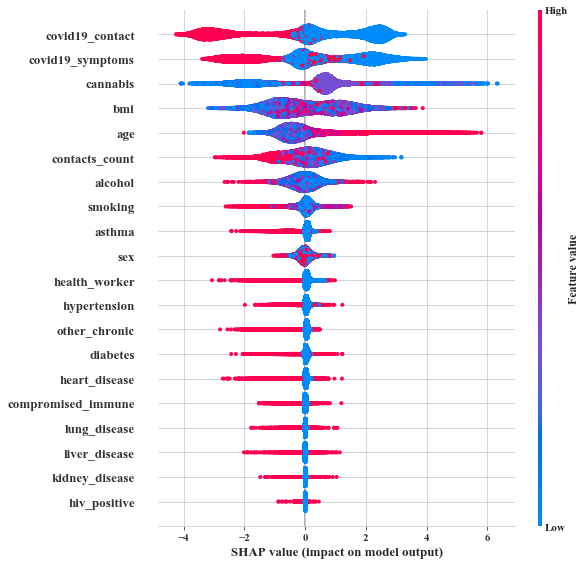

In [62]:
shap.summary_plot(shap_values,x_train)

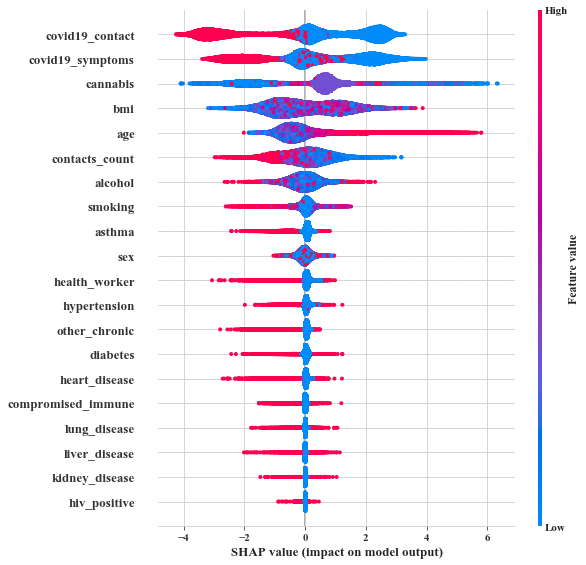

<Figure size 432x288 with 0 Axes>

In [83]:

shap.summary_plot(shap_values,x_train)
plt.savefig('shap_plot_for_XGB_model.png',dpi=600)

#  Classifier's performance evaluation

In [91]:
x_train_new = x_train
y_train_new = y_train
x_test_new = x_test
y_test_new = y_test

In [95]:
import pickle 
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [96]:
#estimator and names fuction
def est(clf, names):
    estm = []
    for i in range(len(clf)):
        n = names[i]
        claf = clf[i]
        estm.append((n, claf))
    return estm


name = [
    'HHO LGB OPT', 'HHO CAT OPT', 'HHO RF OPT', 'HHO XGB OPT', 'HHO SVC OPT',
    'ENSEMBLE_MODEL', 'DecisionTreeClassifier', 'KNeighborsClassifier',
    'BernoulliNB', 'LinearDiscriminantAnalysis',
    'QuadraticDiscriminantAnalysis'
]
clf = [
    LGB_opt_clf, CAT_opt_clf, RF_HHO_opt, XGB_opt_clf, SVC_opt, ensemble,
    DT_opt_clf, KNN_opt_clf, NB_Opt_clf, LDA_opt_clf, QLDA_opt_clf
]
est_1 = est(clf, name)
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}

for algorithm, model in est_1:
    y_pred = model.predict(x_test_new)
    y_prob = model.predict_proba(x_test_new)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob

    cross_val_scores[algorithm] = cross_val_score(model,
                                                  x_train_new,
                                                  y_train_new,
                                                  cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test_new, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test_new, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test_new, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test_new, y_pred)
    ppv_scores[algorithm] = precision_score(y_test_new,
                                            y_pred,
                                            average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test_new,
                                                 y_pred,
                                                 average="weighted")
    confusion_matrix_ = confusion_matrix(y_test_new, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP / (FP + TN)).mean()
    specificity_scores[algorithm] = (TN / (TN + FP)).mean()
    threat_scores[algorithm] = (TP / (TP + FN + FP)).mean()
    balanced_accuracy_scores[algorithm] = (
        (sensitivity_scores[algorithm] + specificity_scores[algorithm]) /
        2).mean()
    print('done for one')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.5220794779775828 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=98 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=0.46854465841871085 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.5220794779775828 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=98 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=0.46854465841871085 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.5220794779775828 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=9

In [97]:
performance_metrics = {
    'cross_val_scores': cross_val_scores,
    'accuracy_scores': accuracy_scores,
    'error_scores': error_scores,
    'f1_scores': f1_scores,
    'fpr_scores': fpr_scores,
    'kappa_scores': kappa_scores,
    'mcc_scores': mcc_scores,
    'ppv_scores': ppv_scores,
    'sensitivity_scores': sensitivity_scores,
    'specificity_scores': specificity_scores,
    'threat_scores': threat_scores,
    'balanced_accuracy_scores': balanced_accuracy_scores
}

perfo_m = pd.DataFrame(performance_metrics)
perfo_m.to_csv('performance_comparison_of_diff_model_HHO.csv')